In [1]:
import torch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import time
import os
import random

from utils import *
from dataset import *
from encoder import Encoder
from decoder import DecodeNext, Decoder
from predictor import Predictor

from IPython.display import Image
%load_ext autoreload
%autoreload 2

# write gpu wiki page

In [8]:
DATADIR = './data/gdb13/'
OUTDIR = './run7/'
LOGFILE = os.path.join(OUTDIR, 'log.csv')
DATASPEC_FILE = os.path.join(DATADIR, 'spec.json')

dataspec = fetch_params(DATASPEC_FILE)
modelspec = make_params(hidden_dim=512, latent_dim=256, pred_dim=64, dropout=0.15)

### Data & Model Parameters

In [9]:
trainset, testset = make_data(DATADIR, n=10000)

### Model

In [10]:
encoder = Encoder(modelspec, dataspec)
encoder.load_state_dict(torch.load(OUTDIR + 'encoder_weights.pth'))

decoder = Decoder(modelspec, dataspec)
decoder.load_state_dict(torch.load(OUTDIR + 'decoder_weights.pth'))

predictor = Predictor(modelspec, dataspec)
#predictor.load_state_dict(torch.load(OUTDIR + 'predictor_weights.pth'))

TypeError: Predictor.__init__() takes 2 positional arguments but 3 were given

In [ ]:
s1, s2 = random.sample(smiles_test, 2)
print(f'{s1}\t\t{s2}')

s1 = to_one_hot(s1, params)
s2 = to_one_hot(s2, params)

mu1, logvar1, z1 = encoder(s1)
mu2, logvar2, z2 = encoder(s2)

s1_pred = decoder(z1)
s2_pred = decoder(z2)

print(f'{from_one_hot(s1_pred, params)[0]}\t\t{from_one_hot(s2_pred, params)[0]}')

print(f"Euclidean Distance of Means: {float(torch.pow(torch.sum(torch.pow(mu1 - mu2, 2)), 0.5))}")
print(f"Euclidean Distance of Samples: {float(torch.pow(torch.sum(torch.pow(z1 - z2, 2)), 0.5))}")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True)

ax1.imshow(torch.softmax(s1_pred, dim=2).squeeze(0).detach().numpy())
ax2.imshow(torch.softmax(s1, dim=2).squeeze(0).detach().numpy())

ax3.imshow(torch.softmax(s2_pred, dim=2).squeeze(0).detach().numpy())
ax4.imshow(torch.softmax(s2, dim=2).squeeze(0).detach().numpy())

plt.subplots_adjust(wspace=0, hspace=0)

## Test

In [ ]:
evaluate_ae(encoder, decoder, smiles_test, 10, params=params)

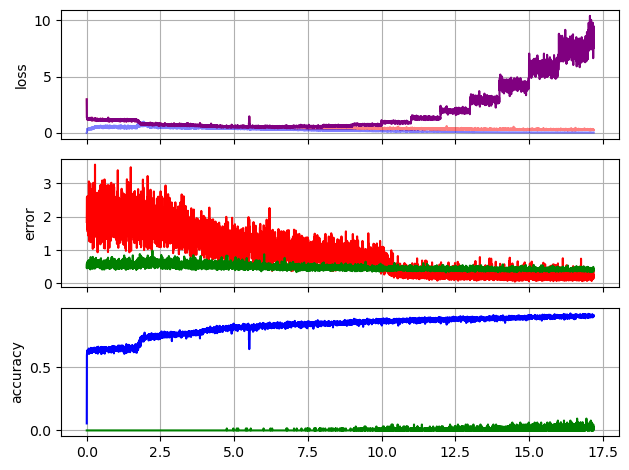

In [11]:
log = pd.read_csv('run7/log.csv')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

every = 1

epoch = log['i'] * (32/1280000)

ax1.set_ylabel('loss')
ax1.plot(epoch, log['ce'][::every], color='red', alpha=0.5)
ax1.plot(epoch, 0.1*log['kl'][::every], color='blue', alpha=0.5)
ax1.plot(epoch, log['loss'][::every], color='purple')
ax1.grid()

ax2.set_ylabel('error')
ax2.plot(epoch, log['logp'][::every], color='red')
ax2.plot(epoch, log['qed'][::every], color='green')
#ax2.plot(log['sas'][::every], color='blue')
ax2.grid()

ax3.set_ylabel('accuracy')
ax3.plot(epoch, log['accuracy'][::every], color='blue')
ax3.plot(epoch, log['prec'][::every], color='green')
ax3.grid()

#plt.savefig('run.png')

plt.tight_layout()

In [13]:
log['accuracy']

0       0.055469
1       0.583594
2       0.594141
3       0.601953
4       0.610937
          ...   
6874    0.908594
6875    0.902734
6876    0.900781
6877    0.908203
6878    0.910156
Name: accuracy, Length: 6879, dtype: float64